In [1]:
import pandas as pd
import numpy as np

C:\Users\dpkar\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [19]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
from pandas.core.computation.check import NUMEXPR_INSTALLED

### Part 1: Data Cleaning and Preprocessing
#### 1.1 Load and Inspect the Dataset
• Load the dataset and display its shape, column names, and data types.

• Identify and list the number of missing values in each column.


In [3]:
# Load the dataset
df = pd.read_csv('Building_Energy_Benchmarking.csv')


In [6]:
# To display the shape of the dataset
print(f'The shape of the dataset: ')
display(df.shape )   # dataset is having 494 rows and 31 columns



The shape of the dataset: 


(494, 31)

In [7]:
display(df.columns)

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emissions - Ons

In [13]:
# To display the columns according to their datatype:

column_types = ['object', 'int64', 'float64']
for column in column_types:
    print(f'The columns of {column} type are:')
    print(df.select_dtypes(include = column).columns.tolist())
    print('\n')

The columns of object type are:
['Property Name', 'Address 1', 'City', 'Postal Code', 'Province', 'Primary Property Type - Self Selected', 'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)', 'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)', 'District Hot Water Use (GJ)', 'Unique ID']


The columns of int64 type are:
['Property Id', 'Number of Buildings', 'Year Built', 'Year Ending']


The columns of float64 type are:
['ENERGY STAR Score', 'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)', 'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)', 'Total GHG Emissions Intensity (kgCO2e/m²)', 'Direct GHG Emissions Intensity (kgCO2e/m²)', 'Electricity Use – Generated from Onsite Renewable Systems (kWh)', 'Green Power - Onsite and Offsite (kWh)', 'Avoided Emi

In [58]:

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Property Id                                                            494 non-null    int64  
 1   Property Name                                                          494 non-null    object 
 2   Address 1                                                              494 non-null    object 
 3   City                                                                   494 non-null    object 
 4   Postal Code                                                            494 non-null    object 
 5   Province                                                               494 non-null    object 
 6   Primary Property Type - Self Selected                                  494 non-null    obj

None

In [24]:
df.head(3)

,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),District Hot Water Use (GJ),Electricity Use – Generated from Onsite Renewable Systems (kWh),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838,...,280,152.4,368616,5453,NaN,NaN,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,t2e7l7,Alberta,Office,1,1981,7770,...,243,31.2,1091854,4725,NaN,NaN,1091854.0,508.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681,...,0,0.0,508589,3,2180,NaN,508589.0,236.0,2023,2023-6305956


In [25]:
# To check for duplicated rows:
df.duplicated().sum()

print(f'The number of duplicated rows: {df.duplicated().sum()}')

The number of duplicated rows: 0


In [14]:
# To display the number of missing values in each column
print('The percent of missing values in each column: ')
display(df.isna().sum()/len(df)*100 )

print('\n')

print('The columns having more than 40% missing values')
display(df.columns[df.isna().sum()/len(df)*100 > 40.0])

The percent of missing values in each column: 


Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               0.000000
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                         0.000000
ENERGY STAR Score                                                        66.599190
Site Energy Use (GJ)                                                      0.000000
Weat



The columns having more than 40% missing values


Index(['ENERGY STAR Score', 'District Hot Water Use (GJ)',
       'Electricity Use – Generated from Onsite Renewable Systems (kWh)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)'],
      dtype='object')

### 1.2 Handling Missing Data
• Drop columns with more than 40% missing values.

• For numerical columns, fill missing values with the median of their respective column.

• For categorical columns, fill missing values with the mode of their respective column.

In [15]:
# Remove columns with more than 40% missing values

column_threshold = 0.4*len(df)
print(f'The threshold for missing values in columns is {round(column_threshold,3)} ')

The threshold for missing values in columns is 197.6 


In [17]:
# remove the columns that have more than 40% missing values
df_na_removed = df.dropna(thresh = column_threshold, axis = 1)

In [66]:
# shape of the dataset after removing columns with > 40% na values
df_na_removed.shape

(494, 28)

In [67]:
# shape of the original dataset
df.shape

(494, 31)

In [33]:
# check the percent of missing values in the dataset
missing_values = df_na_removed.isna().sum()/len(df_na_removed)*100
display(missing_values)


Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               0.000000
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                         0.000000
Site Energy Use (GJ)                                                      0.000000
Weather Normalized Site Energy Use (GJ)                                   0.000000
Site

The columns with missing values


['Weather Normalized Source Energy Use (GJ)',
 'Natural Gas Use (GJ)',
 'Green Power - Onsite and Offsite (kWh)',
 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)']

In [47]:
# The columns with missing values
print('The columns with missing values after removing those columns with > 40% na are:')
cols_to_impute = missing_values[missing_values > 0.0].index.tolist()
display(cols_to_impute)

The columns with missing values after removing those columns with > 40% na are:


['Weather Normalized Source Energy Use (GJ)',
 'Natural Gas Use (GJ)',
 'Green Power - Onsite and Offsite (kWh)',
 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)']

In [68]:
# To get the statistical summary of the numerical columns: 
df_na_removed.describe()

,Property Id,Number of Buildings,Year Built,Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions Intensity (kgCO2e/m²),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending
count,4.940000e+02,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,2.960000e+02,296.000000,494.000000
mean,1.308877e+07,1.060729,1980.091093,1.774798,1.810324,2.282753,2.319717,158.671660,63.821862,5.997183e+05,278.847635,2020.995951
std,5.659556e+06,0.278281,25.159568,1.306700,1.331529,1.597846,1.622897,109.472637,56.835735,1.196070e+06,556.048804,1.414208
min,6.169481e+06,1.000000,1896.000000,0.060000,0.060000,0.110000,0.110000,10.200000,0.000000,1.040400e+03,0.500000,2019.000000
25%,9.563763e+06,1.000000,1970.000000,0.990000,1.000000,1.312500,1.350000,93.100000,33.325000,1.030868e+05,48.000000,2020.000000
50%,9.997794e+06,1.000000,1978.000000,1.290000,1.310000,1.680000,1.690000,117.600000,43.900000,2.203235e+05,102.500000,2021.000000
75%,2.198860e+07,1.000000,1996.000000,2.065000,2.110000,2.622500,2.652500,186.975000,74.050000,5.415978e+05,252.000000,2022.000000
max,2.198863e+07,3.000000,2018.000000,8.430000,8.360000,10.130000,10.060000,666.200000,386.000000,9.618604e+06,4472.000000,2023.000000


In [69]:
df_na_removed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Property Id                                                            494 non-null    int64  
 1   Property Name                                                          494 non-null    object 
 2   Address 1                                                              494 non-null    object 
 3   City                                                                   494 non-null    object 
 4   Postal Code                                                            494 non-null    object 
 5   Province                                                               494 non-null    object 
 6   Primary Property Type - Self Selected                                  494 non-null    obj

In [70]:
# to get names of all the columns that are of dtype 'object':
# Syntax is df.select_dtypes(include = ['object']).columns

df_na_removed.select_dtypes(include=['object']).columns


Index(['Property Name', 'Address 1', 'City', 'Postal Code', 'Province',
       'Primary Property Type - Self Selected',
       'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)',
       'Weather Normalized Site Energy Use (GJ)', 'Source Energy Use (GJ)',
       'Weather Normalized Source Energy Use (GJ)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'Unique ID'],
      dtype='object')

Among the columns of object type, some need to be converted into float type to be able to do further numerical calculations.
The following columns need to be converted to float type:

    'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)',

    'Weather Normalized Site Energy Use (GJ)', 'Source Energy Use (GJ)',
       
    'Weather Normalized Source Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)',
       
    'Direct GHG Emissions (Metric Tons CO2e)', 'Electricity Use - Grid Purchase (kWh)', 

    'Natural Gas Use (GJ)'


On inspection of the values in these columns, we found that some values were having commas. We first removed the commas and then converted these values to float type

In [21]:
convert_to_float = ['Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)','Weather Normalized Site Energy Use (GJ)', 
                       'Source Energy Use (GJ)','Weather Normalized Source Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)',
                       'Direct GHG Emissions (Metric Tons CO2e)', 'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)']


# On inspection of the values in these columns, we found that some values were having commas. 
# We first removed the commas and then converted these values to float type
for column in convert_to_float:
    df_na_removed[column] = df_na_removed[column].str.replace(',','').astype(float)

In [22]:
df_na_removed.select_dtypes(include=['object']).columns

Index(['Property Name', 'Address 1', 'City', 'Postal Code', 'Province',
       'Primary Property Type - Self Selected', 'Unique ID'],
      dtype='object')

In [43]:
# The columns with missing values (< 40%) that need to be handled
print('The columns with missing values that need to be handled ')
display(cols_to_impute)


# checking the dtype of columns with missing values
for col in cols_to_impute:
    print(df_na_removed[col].dtype)

['Weather Normalized Source Energy Use (GJ)',
 'Natural Gas Use (GJ)',
 'Green Power - Onsite and Offsite (kWh)',
 'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)']

float64
float64
float64
float64


In [44]:
# To fill the missing values in a column with the median of the column:

for col in cols_to_impute:
     df_na_removed[col].fillna(df_na_removed[col].median(), inplace = True)



In [46]:
# checking for missing values in the dataframe:

df_na_removed.isna().sum()

Property Id                                                              0
Property Name                                                            0
Address 1                                                                0
City                                                                     0
Postal Code                                                              0
Province                                                                 0
Primary Property Type - Self Selected                                    0
Number of Buildings                                                      0
Year Built                                                               0
Property GFA - Self-Reported (m²)                                        0
Site Energy Use (GJ)                                                     0
Weather Normalized Site Energy Use (GJ)                                  0
Site EUI (GJ/m²)                                                         0
Weather Normalized Site E

#### 1.3 Extracting and Cleaning Data Using Regex
• Use Regex only to:

o Extract numeric values from text-based numeric columns (e.g., Property GFA,
Energy Use, Emissions).

o Standardize Postal Codes to follow the Canadian format (A1A 1A1).

o Clean and extract meaningful text from Property Names and Addresses.

o Ensure extracted values are properly converted to numerical types for analysis.

In [52]:
#df_na_removed.head(3)

In [62]:
# To convert Postal codes into uppercase:
df_na_removed['Postal Code'] = df_na_removed['Postal Code'].str.upper()

In [75]:
#Remove the spaces between a postal code
df_na_removed['Postal Code'] = df_na_removed['Postal Code'].str.replace(' ','')


# Regex
pattern = r'([A-Z]\d[A-Z])(\d[A-Z]\d)'
df_na_removed['Postal Code'] = df_na_removed['Postal Code'].str.replace(pattern, r'\1 \2', regex = True)

# Checking if the length of Postal Code is 7 (because postal code is in the format 'A1A 1A1' and therefore is of length 7)
df_na_removed['Postal Code'][df_na_removed['Postal Code'].str.len() != 7].index

7      T2AOK9
195    T2AOK9
324    T2AOK9
Name: Postal Code, dtype: object

In [82]:
postal_code_needsformat = df_na_removed['Postal Code'][df_na_removed['Postal Code'].str.len() != 7].index.tolist()

In [83]:
df_na_removed['Postal Code'][7][: 3]

'T2A'

In [84]:
# add a space in those postal codes which are not of length 7
for i in postal_code_needsformat:
    df_na_removed['Postal Code'][i] = df_na_removed['Postal Code'][i][: 3]+ ' ' +df_na_removed['Postal Code'][i][3: ]

In [86]:
# checking to see if postal codes have been standardised to the Canadian format 
df_na_removed['Postal Code'][df_na_removed['Postal Code'].str.len() != 7]


Series([], Name: Postal Code, dtype: object)

### 2.2 Aggregations

#### Compute the average Energy Use Intensity (EUI) by Property Type.



In [137]:
# Compute the average Energy Use Intensity (EUI) by Property Type.

df_na_removed.groupby('Primary Property Type - Self Selected')['Site EUI (GJ/m²)'].mean().sort_values(ascending = False).reset_index()

,Primary Property Type - Self Selected,Site EUI (GJ/m²)
0,Heated Swimming Pool,4.805333
1,Fitness Center/Health Club/Gym,4.385000
2,Distribution Center,3.286000
3,Ice/Curling Rink,2.182200
4,Other - Recreation,2.165000
5,Museum,1.584000
6,Social/Meeting Hall,1.550000
7,Other - Public Services,1.526000
8,Office,1.519636
9,Performing Arts,1.302000


#### Compute the total Greenhouse Gas (GHG) emissions by year.

In [51]:
# Compute the total Greenhouse Gas (GHG) emissions by year.
df_na_removed.groupby('Year Ending')['Total GHG Emissions (Metric Tons CO2e)'].mean()

Year Ending
2019    763.690909
2020    672.901010
2021    688.251515
2022    730.313131
2023    766.653061
Name: Total GHG Emissions (Metric Tons CO2e), dtype: float64

#### Identify the top 5 properties with the highest total energy consumption.

In [142]:
#Identify the top 5 properties with the highest total energy consumption.
df_na_removed.nlargest(5, 'Site Energy Use (GJ)')[['Property Name', 'Site Energy Use (GJ)', 'Year Ending']]

,Property Name,Site Energy Use (GJ),Year Ending
293,Stoney Transit Facility,243202.0,2023
457,Stoney Transit Facility,160486.0,2022
372,Stoney Transit Facility,146772.3,2021
244,Stoney Transit Facility,101625.5,2020
173,Village Square Leisure Centre,100146.6,2019


### 2.3 Detecting Outliers Using Regex and IQR
• Use Regex only to:

        o Identify values that do not conform to expected numeric formats.
        o Remove or correct incorrectly formatted numeric values.

• Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions
(Metric Tons CO2e).

• Replace outliers with the median value for that property type.

In [240]:
# IQR
Q1 = df_na_removed['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
Q3 = df_na_removed['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75)
IQR = Q3 - Q1

# 
negative_outlier = Q1 - 1.5 * IQR
positive_outlier = Q3 + 1.5 * IQR

# outliers
outliers = df_na_removed[(df_na_removed['Total GHG Emissions (Metric Tons CO2e)'] < negative_outlier) | (df_na_removed['Total GHG Emissions (Metric Tons CO2e)'] > positive_outlier)]
print("Few rows with Outliers :")
display(outliers.head(3))
print(f"Number of outliers in Total GHG emissions: {len(outliers)}")

Few rows with Outliers :


,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
16,10170296,Emergency Operations Centre,673 1 ST NE,Calgary,T2E 6R2,Alberta,Office,1,2012,5213.0,...,2931.0,562.1,230.0,44.0,4356404.0,4469.0,4356405.0,2025.0,2023,2023-10170296
57,9492075,Foothills Aquatic Centre and Bauer and Bush Ar...,2424 University DR NW,Calgary,T2N 3Y9,Alberta,Ice/Curling Rink,2,1963,8558.0,...,2444.0,285.5,898.0,104.9,2493859.0,17477.0,2493859.0,1159.0,2023,2023-9492075
69,21988597,"Manchester Building E - North and South Tower,...",2808 SPILLER RD SE,Calgary,T2G 4H3,Alberta,Office,3,1956,6988.0,...,1979.0,283.3,545.0,78.1,2312959.0,10621.0,2312959.0,1075.0,2023,2023-21988597


Number of outliers in Total GHG emissions: 46


In [258]:
# Replace outliers with the median value for that property type.

for index, row in outliers.iterrows():
    property_type = row['Primary Property Type - Self Selected']
    median_value = df_na_removed[df_na_removed['Primary Property Type - Self Selected'] == property_type]['Total GHG Emissions (Metric Tons CO2e)'].median()
    df_na_removed.at[index, 'Total GHG Emissions (Metric Tons CO2e)'] = median_value

print("DataFrame after replacing outliers:\n")
display(df_na_removed.head(2))

DataFrame after replacing outliers:



,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Green Power - Onsite and Offsite (kWh),Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838.0,...,509.0,276.7,280.0,152.4,368616.0,5453.0,368616.0,171.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,T2E 7L7,Alberta,Office,1,1981,7770.0,...,920.0,118.4,243.0,31.2,1091854.0,4725.0,1091854.0,508.0,2023,2023-6169481


## Part 3: Data Visualization

### 3.1 Time-Series Visualization

    • Plot the yearly trend of average Site Energy Use Intensity (EUI).
    • Highlight any significant increases or decreases in energy usage.


    

In [91]:
import matplotlib.pyplot as plt


# Calculate the yearly trend of average Site EUI
Annual_avg_site_EUI = df_na_removed.groupby('Year Ending')['Site EUI (GJ/m²)'].mean().reset_index()

Annual_avg_site_EUI

,Year Ending,Site EUI (GJ/m²)
0,2019,1.981313
1,2020,1.696869
2,2021,1.681515
3,2022,1.781616
4,2023,1.732245


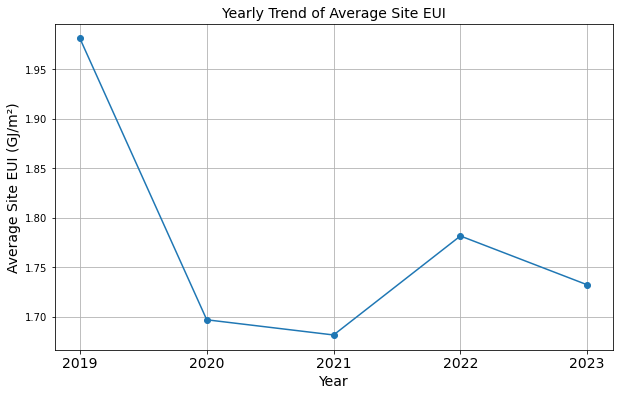

In [98]:
# Plot the yearly trend of average Site EUI
plt.figure(figsize=(10, 6))

plt.plot(Annual_avg_site_EUI['Year Ending'].values, Annual_avg_site_EUI['Site EUI (GJ/m²)'].values, marker='o')
plt.title('Yearly Trend of Average Site EUI', fontsize = 14)

plt.xlabel('Year', fontsize = 14)
plt.xticks(Annual_avg_site_EUI['Year Ending'].values, fontsize = 14)
plt.ylabel('Average Site EUI (GJ/m²)', fontsize = 14)
plt.grid(True)

### 3.2 Comparative Bar Charts

    • Create a bar chart showing the top 10 buildings with the highest GHG emissions.
    • Annotate the bar chart with emission values.

In [153]:
Top10_ghg_buildings = df_na_removed.groupby('Property Name')['Total GHG Emissions (Metric Tons CO2e)'].mean().sort_values(ascending = False)[:10].reset_index()
display(Top10_ghg_buildings)

,Property Name,Total GHG Emissions (Metric Tons CO2e)
0,Municipal Complex,10046.68
1,Stoney Transit Facility,8033.38
2,Village Square Leisure Centre,4676.66
3,Southland Leisure Centre,4283.28
4,Emergency Operations Centre,3072.64
5,"Manchester Building E - North and South Tower,...",2701.26
6,Foothills Aquatic Centre and Bauer and Bush Ar...,2297.82
7,Max Bell and Ken Bracko Arenas,2262.46
8,Whitehorn Multi-Services Centre,2255.92
9,Andrew Davison,1462.90


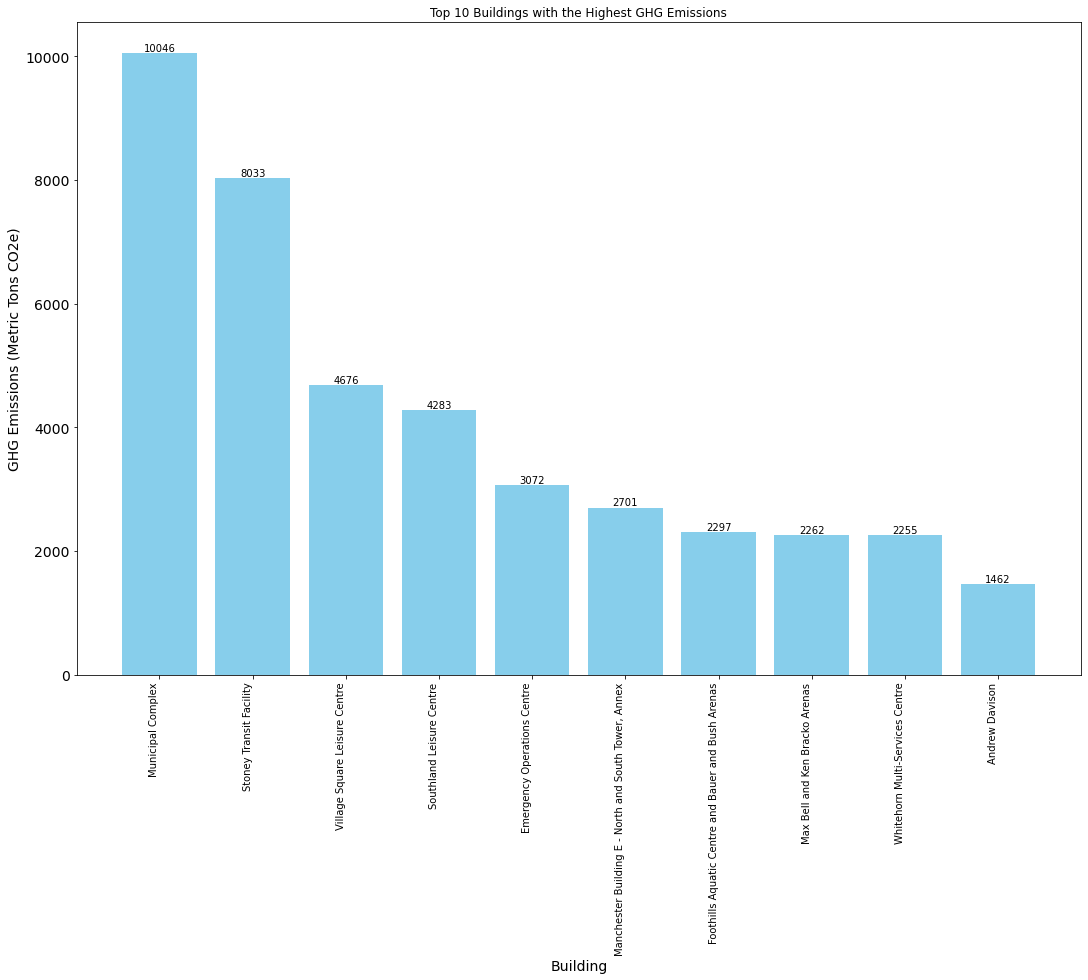

In [172]:
plt.figure(figsize=(18, 12))
bars = plt.bar(Top10_ghg_buildings['Property Name'], Top10_ghg_buildings['Total GHG Emissions (Metric Tons CO2e)'], color='skyblue')

# Add annotations to indicate the emission values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 , yval, int(yval), ha='center', va='bottom')
    
    
plt.title('Top 10 Buildings with the Highest GHG Emissions')
plt.ylabel('GHG Emissions (Metric Tons CO2e)', fontsize = 14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='right')
plt.yticks(fontsize = 14)
plt.xlabel('Building', fontsize = 14)
plt.show()

### 3.3 Heatmap Visualization

    • Create a heatmap of energy usage intensity (Site EUI (GJ/m²)) across different property
    types.

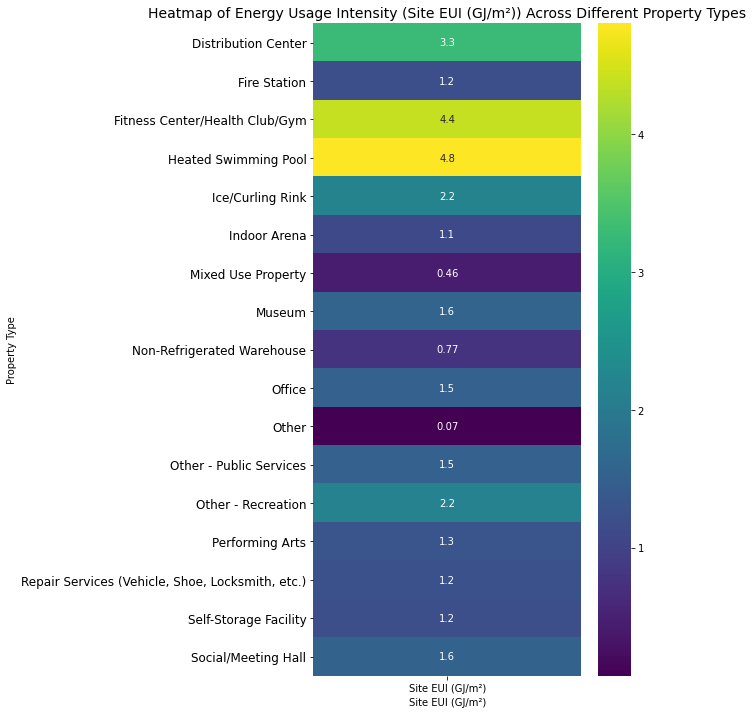

In [186]:
#energy_usage = df_na_removed.groupby('Property Type')['Site EUI (GJ/m²)']

pivot_table = df_na_removed.pivot_table(values='Site EUI (GJ/m²)', index= 'Primary Property Type - Self Selected')

# Create a heatmap
plt.figure(figsize=(6, 12))
sns.heatmap(pivot_table, annot=True, cmap='viridis', cbar=True)

plt.title('Heatmap of Energy Usage Intensity (Site EUI (GJ/m²)) Across Different Property Types', fontsize = 14 )
plt.xlabel('Site EUI (GJ/m²)')
plt.ylabel('Property Type')
plt.yticks(fontsize = 12)
plt.show()

## Part 4: Further Analysis

### 4.1 Correlation Analysis
• Compute and visualize the correlation matrix between energy consumption, emissions,
and building size.

• Identify any strong correlations and explain their implications.

In [187]:
df_na_removed.columns

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)',
       'Weather Normalized Site Energy Use (GJ)', 'Site EUI (GJ/m²)',
       'Weather Normalized Site EUI (GJ/m²)', 'Source Energy Use (GJ)',
       'Weather Normalized Source Energy Use (GJ)', 'Source EUI (GJ/m²)',
       'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'Green Power - Onsite and Offsite (kWh)',
       'Avoided Emissions - Onsite and Offsite Green Power (Metric Tons CO2e)',
       'Year Ending', 'Unique ID'],
      dtype='object')

In [206]:
correlation_df = df_na_removed.loc[:, ['Site Energy Use (GJ)','Total GHG Emissions (Metric Tons CO2e)', 'Property GFA - Self-Reported (m²)']]
correlation_df.rename(columns = {'Site Energy Use (GJ)': 'Energy Usage', 'Total GHG Emissions (Metric Tons CO2e)': 'Emissions','Property GFA - Self-Reported (m²)': 'Building Size' }, inplace = True)
print(correlation_df.head(10))

   Energy Usage  Emissions  Building Size
0        6780.0      509.0         1838.0
1        8656.0      920.0         7770.0
2        4014.0      499.0         6681.0
3       11237.0     1293.0        17468.0
4        6757.0      568.0         2143.0
5        5656.0      554.0         6632.0
6        2924.0      229.0         1807.0
7        8065.0      674.0         1641.0
8         693.0       63.0          832.0
9        7809.0      781.0        15195.0


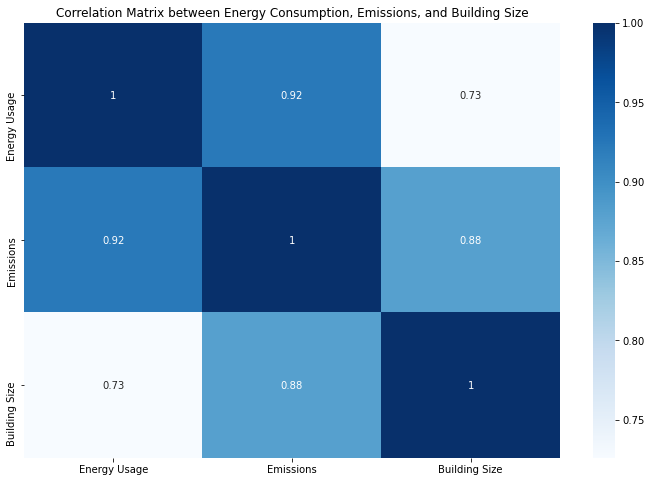

In [208]:
# Compute the correlation matrix
corr_matrix = correlation_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', cbar=True)

plt.title('Correlation Matrix between Energy Consumption, Emissions, and Building Size')
plt.show()

The correlation matrix shows a strong correlation between Emissions and Building size 
and between Emissions and Energy Usage. 

Strong correlation between emissions and building size indicates that as the building size increases,its emissions too increase- i.e. larger buildings tend to have higher green house gas emissions. This might be due to the fact that the energy required to maintain, power and regulate the temperatures in larger spaces is high. Larger building need to invest to improve their energy efficiency.

Strong correlation between emissions and energy usage indicates that higher energy consumption leads to higher emissions. In order to reduce emissions, energy consumption should be reduced. This can be achieved by investing into developing new and improved efficient energy systems, 
adopting renewable energy resources and energy conservation measures.  


### 4.2 Hypothesis Testing

• Conduct a t-test (t-test is used to compare the means of two groups to determine if
they are significantly different from each other. More at Student's t-test - Wikipedia)
comparing the average Energy Star Score between two different property types (e.g.,
Offices vs. Residential buildings).

• Interpret the results and discuss statistical significance.

## ** Note **
Earlier, during the initial steps of Data cleaning and pre-processing, we removed the 'ENERGY STAR Score' column as more than 40% values in the column were missing. 

However, since we have to do a t-test here,we decided to create a new dataframe with non-na values of the 'ENERGY STAR Score' column and their corresponding values from 
the 'Unique ID' column ( this is a subset of values from the original dataset). This new dataframe is named as df_energystar.

We then created another dataframe that consists of the columns 'Unique ID' and 'Primary Property Type - Self Selected'. This dataframe is named as df_propertytypes and is a
subset of our original cleaned dataframe- df_na_removed

We then merged the two dataframes - df_energystar and df_propertytypes on 'Unique ID' column. The merged dataframe is named as df_estar_ptype and the column 'Primary Property Type - Self Selected' was renamed as 'Property Type' for ease.  

As the two property types that with enough data to do a test are offices and Ice/Curling Rinks, we decided to perform a t- test to compare the average Energy Star Score between the property types - offices and Ice/Curling Rinks.


In [232]:
# checking the number of na values in 'ENERGY STAR Score' column

print(f'The number of na values in the column- \'ENERGY STAR Score\' is: ') 
print(df['ENERGY STAR Score'].isnull().sum())

The number of na values in the column- 'ENERGY STAR Score' is: 
329


In [214]:
# checking if the original df has a column with all unique values that can act as the key when merging dfs
df["Unique ID"].nunique() == len(df)

True

In [215]:
# creating a dataframe with non null values of ENERGY STAR Score column

df_energystar = df[~ df['ENERGY STAR Score'].isnull()][["Unique ID",'ENERGY STAR Score']]

In [216]:
# length of the new dataframe
len(df_energystar)

165

In [217]:
# creating a new dataframe from the cleaned df with Unique ids and property types
df_propertytypes = df_na_removed[['Unique ID', 'Primary Property Type - Self Selected']]

In [218]:
len(df_propertytypes)

494

In [219]:
# merging the two dfs to create a new df for t-test

df_estar_ptype = pd.merge(df_energystar, df_propertytypes, on= ['Unique ID'], how='left')
display(df_estar_ptype)

,Unique ID,ENERGY STAR Score,Primary Property Type - Self Selected
0,2023-6169481,32.0,Office
1,2023-6305956,80.0,Office
2,2023-8854296,84.0,Office
3,2023-21988603,1.0,Office
4,2023-10439156,61.0,Office
...,...,...,...
160,2022-21988603,1.0,Office
161,2022-21988608,67.0,Office
162,2022-21988609,17.0,Office
163,2022-21988616,29.0,Office


In [222]:
# Rename the column for ease
df_estar_ptype.rename(columns = {'Primary Property Type - Self Selected': 'Property Type'}, inplace = True)



In [223]:
# check the value counts of property types to select 2 groups of buildings for our t-test
# There's enough data for the 2 property types - offices and Ice/Curling Rinks

df_estar_ptype['Property Type'].value_counts()

Property Type
Office                        94
Ice/Curling Rink              45
Non-Refrigerated Warehouse    15
Self-Storage Facility          5
Distribution Center            5
Museum                         1
Name: count, dtype: int64

In [233]:
# t- test to compare the average Energy Star Score between 2 property types - offices and Ice/Curling Rinks

import pandas as pd
from scipy.stats import ttest_ind


# Separate the data into two groups
office_scores = df_estar_ptype[df_estar_ptype['Property Type'] == 'Office']['ENERGY STAR Score']
icerink_scores = df_estar_ptype[df_estar_ptype['Property Type'] == 'Ice/Curling Rink']['ENERGY STAR Score']

# Conduct a t-test
t_stat, p_value = ttest_ind(office_scores, icerink_scores)

# Interpret the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("The difference in average Energy Star Scores between Offices and Ice/Curling rinks is statistically significant.")
else:
    print("The difference in average Energy Star Scores between Offices and Ice/Curling rinks is not statistically significant.")

T-statistic: 3.2423927715555587
P-value: 0.0014886772098221066
The difference in average Energy Star Scores between Offices and Ice/Curling rinks is statistically significant.


Since the p-value observed here is very less than the commonly used threshold, alpha = 0.05, 
we can conclude that there is statistically significant difference in average Energy Star Scores between Offices and Ice/Curling rinks and that this difference is unlikely to have occured due to chance.

## Summary Report

#### Key Trends in energy consumption and efficiency:
Larger buildings tend to have higher green house gas emissions. Strong correlation between emissions and building size indicates that as the building size increases,its emissions too increase. This might be due to the fact that the energy required to maintain, power and regulate the temperatures in larger spaces is high. Larger building need to invest to improve their energy efficiency.

Higher energy consumption leads to higher emissions as evident in strong correlation between emissions and energy usage. In order to reduce emissions, energy consumption should be reduced. This can be achieved by investing into developing new and improved efficient energy systems, adopting renewable energy resources and energy conservation measures.



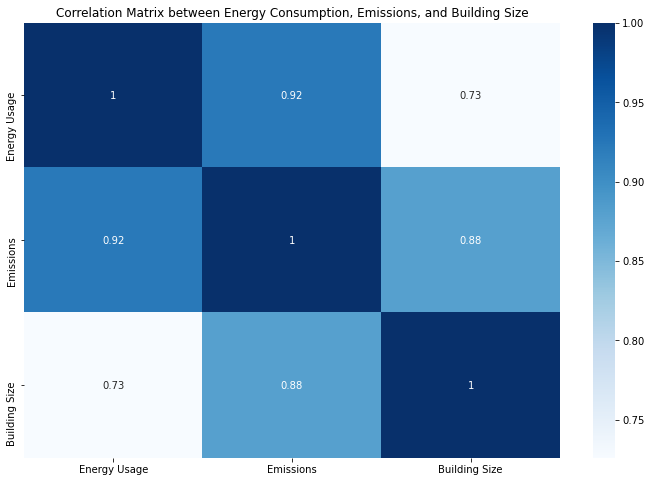

In [259]:
# Correlation Matrix between Energy Consumption, Emissions and Building Size

#### Property Type variations

From bar chart showing top 10 building with highest GHG emissions and heatmap of energy usage intensity, we observe that:

The Municipal Complex tops the list with the highest GHG emissions at 10,046.68 metric tons of CO2e. This indicates a significant opportunity for energy efficiency improvements and emissions reduction strategies in this building. 

It was also obsserved that there are significant emissions from transit and leisure facilities. The Stoney Transit Facility and Village Square Leisure Centre are the second and third highest emitters, with 8,033.38 and 4,676.66 metric tons of CO2e, respectively. These facilities likely have high energy demands due to their operational nature.  Thus, these buildings are prime candidates for targeted energy-saving measures.

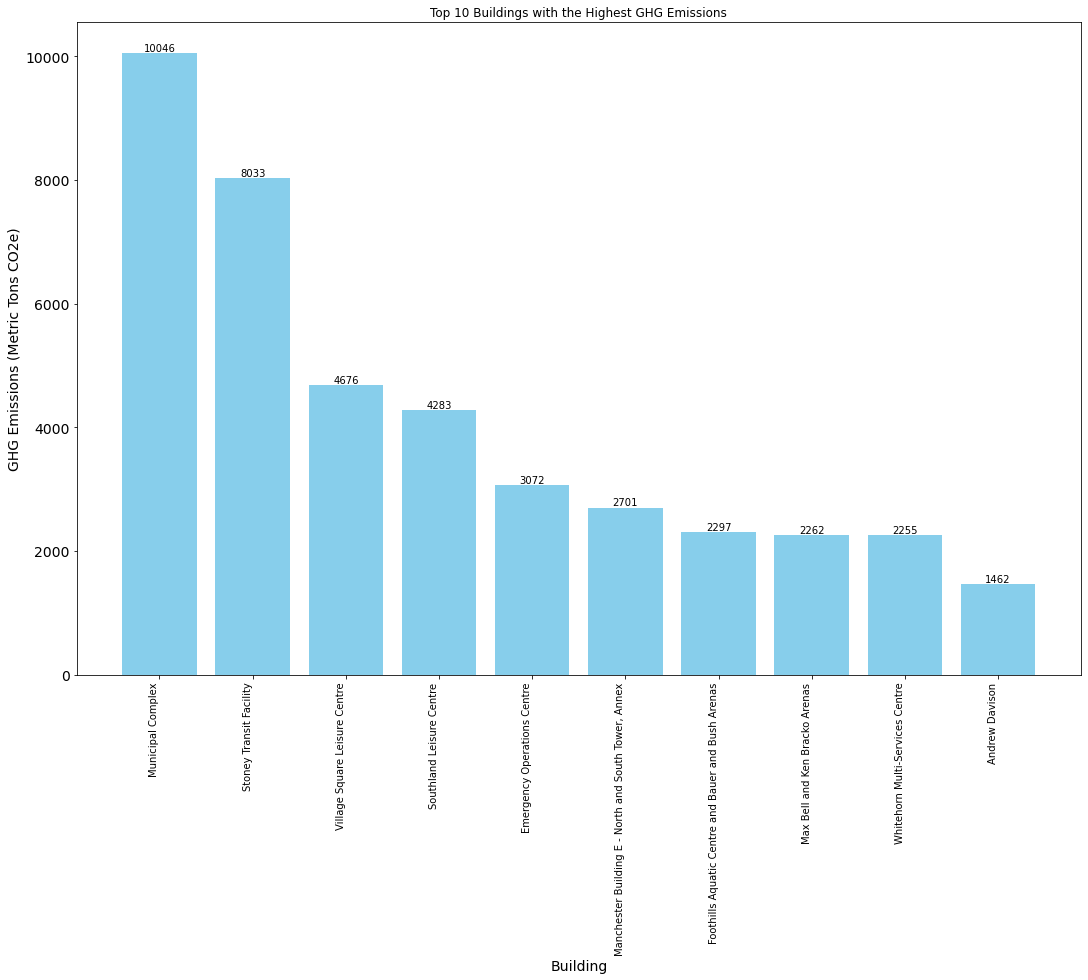

In [260]:
# Top 10 buildings with highest GHG Emissions

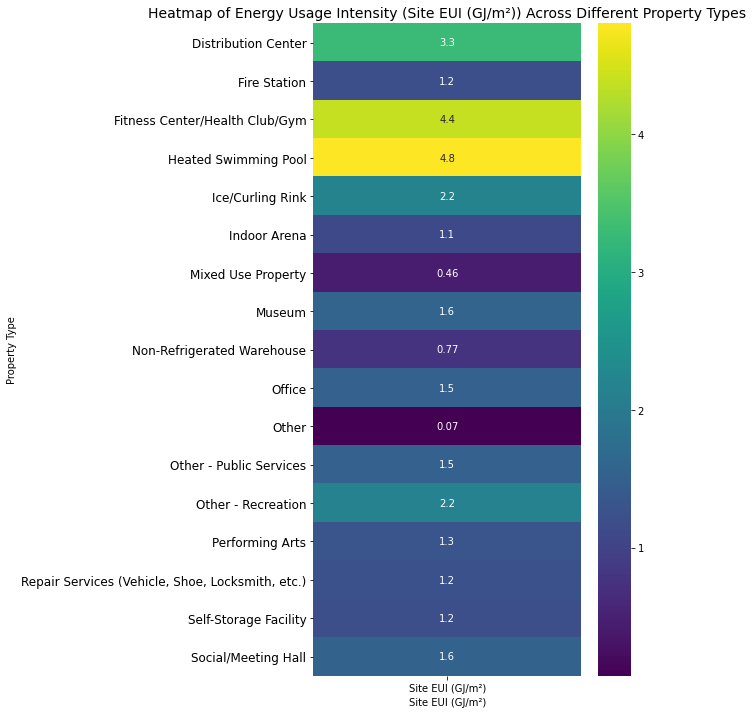

In [261]:
# Heatmap of Energy Usage Intensity Across Different Property TYpes

#### Recommendations for improving energy efficiency and reducing emissions.

Recommendations
Conduct Energy Audits: Perform detailed energy audits for the top-emitting buildings to identify specific areas for improvement.

Implement Energy-Efficient Technologies: Upgrade lighting, and insulation to enhance energy efficiency.

Promote Renewable Energy: Encourage the adoption of renewable energy sources, such as solar panels, to reduce reliance on fossil fuels.

Optimize Operational Practices: Implement best practices for energy management, such as scheduling and automation, to reduce energy consumption during non-peak hours.

#### Data Cleaning and Extraction Using Regex
Regex was used to identify and correct incorrectly formatted values in postal code column of the dataset. Although we did not use this column in our analysis for the present project, this step is crucial in preparing the dataset for further analysis. 


